In [223]:
from sklearn.datasets import fetch_mldata
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
from sklearn.linear_model import SGDClassifier 

In [224]:
mnist = fetch_mldata('MNIST Original')

C:\Users\abhay\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:85: DeprecationWarning: Function fetch_mldata is deprecated; fetch_mldata was deprecated in version 0.20 and will be removed in version 0.22. Please use fetch_openml.
  warnings.warn(msg, category=DeprecationWarning)
C:\Users\abhay\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:85: DeprecationWarning: Function mldata_filename is deprecated; mldata_filename was deprecated in version 0.20 and will be removed in version 0.22. Please use fetch_openml.
  warnings.warn(msg, category=DeprecationWarning)


In [225]:
dir(mnist)

['COL_NAMES', 'DESCR', 'data', 'target']

In [226]:
print(mnist.DESCR)

mldata.org dataset: mnist-original


In [227]:
mnist.target

array([0., 0., 0., ..., 9., 9., 9.])

In [228]:
print(mnist.data)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [229]:
mnist.COL_NAMES

['label', 'data']

In [230]:
X=mnist.data
y=mnist.target

In [231]:
X.shape

(70000, 784)

In [232]:
y.shape

(70000,)

In [233]:
type(X)

numpy.ndarray

In [234]:
type(y)

numpy.ndarray

In [235]:
some_digit=X[36000]

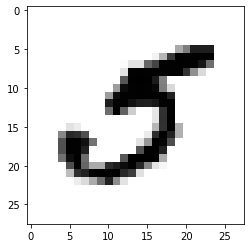

5.0

In [236]:
some_digit_img=some_digit.reshape(28,28)
plt.imshow(some_digit_img , cmap=matplotlib.cm.binary , interpolation='nearest')
plt.show()
y[36000]

In [237]:
X_train=X[:60000]
y_train=y[:60000]
X_test=X[60000:]
y_test=y[60000:]

In [238]:
shuffle_index=np.random.permutation(60000)

In [239]:
X_train,y_train=X[shuffle_index],y[shuffle_index]

In [240]:
sgd_clf=SGDClassifier(random_state=42)

In [241]:
y_train5=(y_train==5)
y_test5=(y_test==5)
y_train5.shape


(60000,)

In [242]:
sgd_clf.fit(X_train, y_train5)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=42, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

In [243]:
sgd_clf.predict([X[36000]])

array([False])

In [245]:
cross_val_score(sgd_clf, X_train, y_train5, cv=3, scoring="accuracy")

array([0.9628 , 0.95795, 0.96915])